> # Import Modules

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

from noventis.predictor import NoventisAutoML
print('Successfully imported modules!')

Successfully imported modules!


> # Prepare for Data Frame

<h2> Classification

In [2]:
df_titanic = sns.load_dataset('titanic')

df_titanic_clean = df_titanic.drop(columns=['deck', 'embark_town', 'alive'])
df_titanic_clean = df_titanic_clean.dropna()

In [3]:
df_titanic_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,True


<h2> Regression

In [4]:
housing = fetch_california_housing()

df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['MedHouseVal'] = housing.target 

In [5]:
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


> # The Full Experience (Default)

<h2> Classfication

✓ Data loaded from DataFrame
  Shape: (712, 12)
  Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'alone']
✓ Data split: Train=569, Test=143
Starting NoventisAutoML Training Process

[AutoML] Starting training...
  Metric: macro_f1
  Time Budget: 30s


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune
INFO:root:ManualPredictor initialized for classification
INFO:root:Starting ManualPredictor Training Pipeline
INFO:root:Data split: Train=569, Test=143
INFO:root:Running internal preprocessor...
INFO:root:Internal preprocessing complete. All data is now numeric.
INFO:root:Processing model: LOGISTIC_REGRESSION
INFO:root:Training finished in 0.02 seconds.
INFO:root:Processing model: RANDOM_FOREST


✓ AutoML training completed
  Best estimator: lgbm

[Comparison] Comparing models...


INFO:root:Training finished in 0.16 seconds.
INFO:root:Processing model: XGBOOST
INFO:root:Training finished in 0.07 seconds.
INFO:root:Processing model: DECISION_TREE
INFO:root:Training finished in 0.00 seconds.
INFO:root:Processing model: LIGHTGBM
INFO:root:Training finished in 4.08 seconds.
INFO:root:Processing model: CATBOOST
INFO:root:Training finished in 1.94 seconds.
INFO:root:Processing model: GRADIENT_BOOSTING
INFO:root:Training finished in 0.16 seconds.
INFO:root:Process Complete!
INFO:root:Best Model: LOGISTIC_REGRESSION with f1_score = 0.8115
INFO:root:Preparing report for display in output cell...


,accuracy,precision,recall,f1_score
model,,,,
logistic_regression,0.8182,0.8182,0.8182,0.8115
lightgbm,0.7972,0.7959,0.7972,0.7865
gradient_boosting,0.7762,0.7762,0.7762,0.7680
catboost,0.7762,0.7752,0.7762,0.7666
xgboost,0.7552,0.7560,0.7552,0.7469
random_forest,0.7483,0.7517,0.7483,0.7416
decision_tree,0.7063,0.7125,0.7063,0.6998

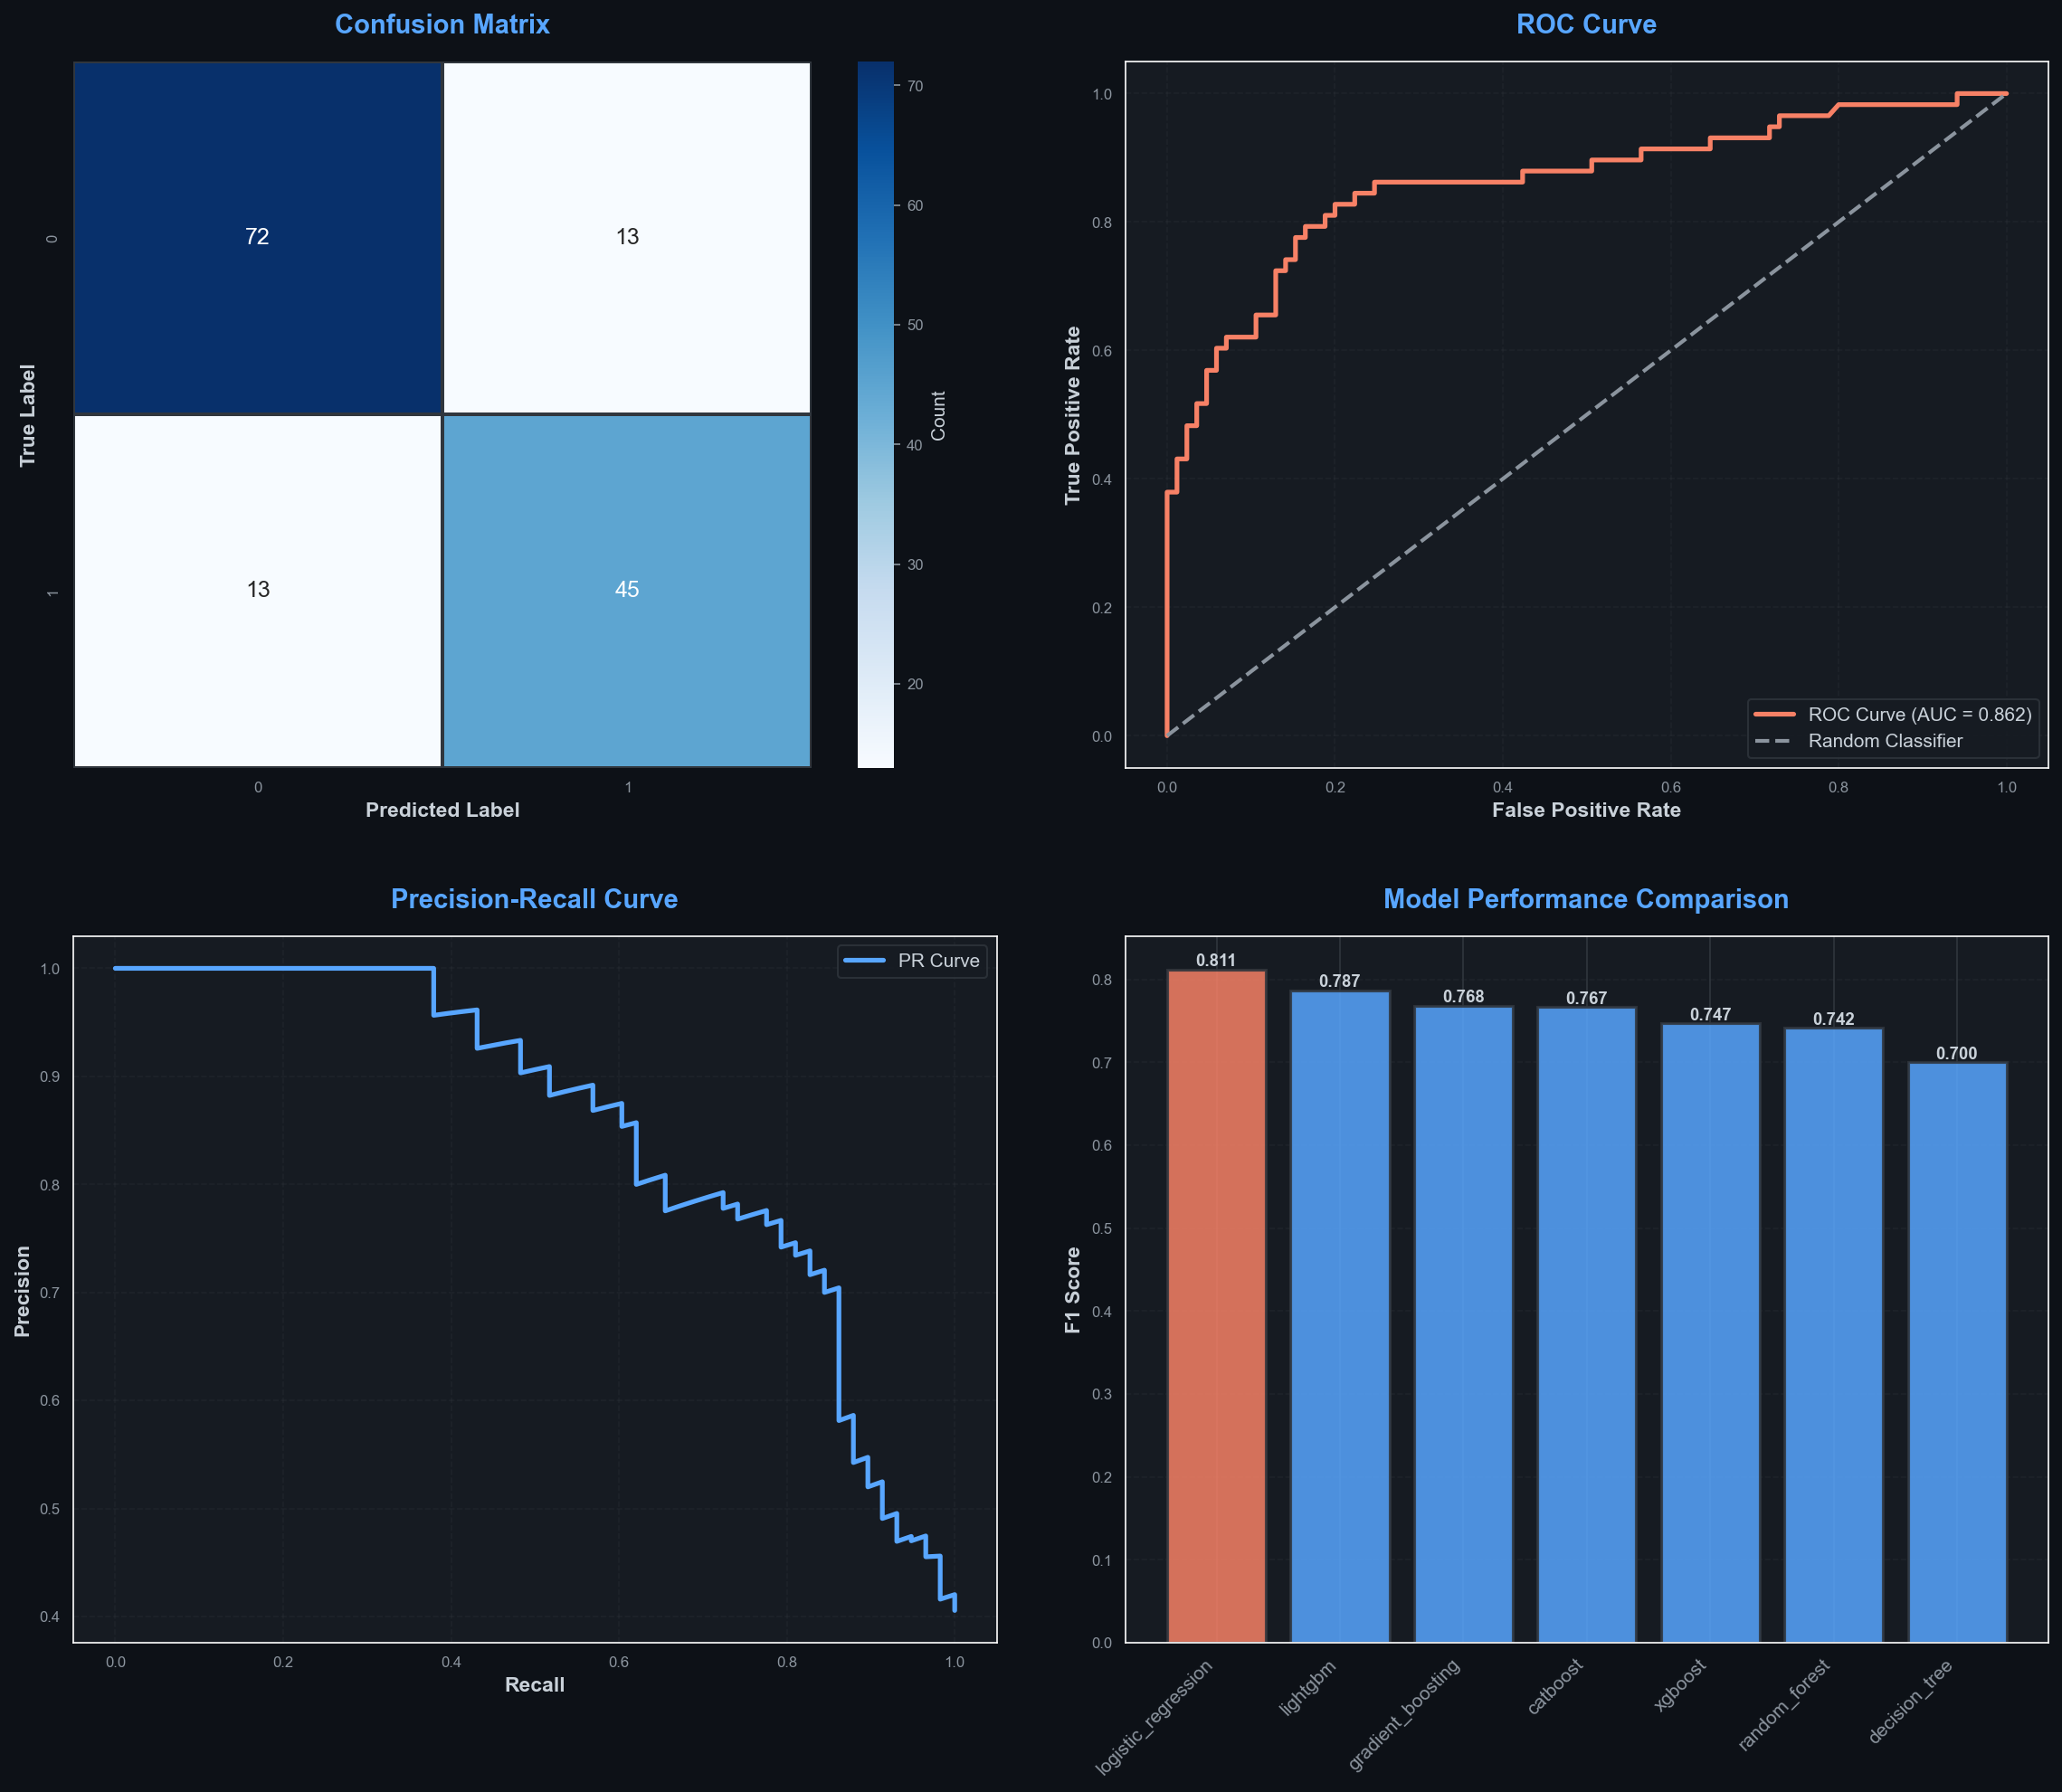
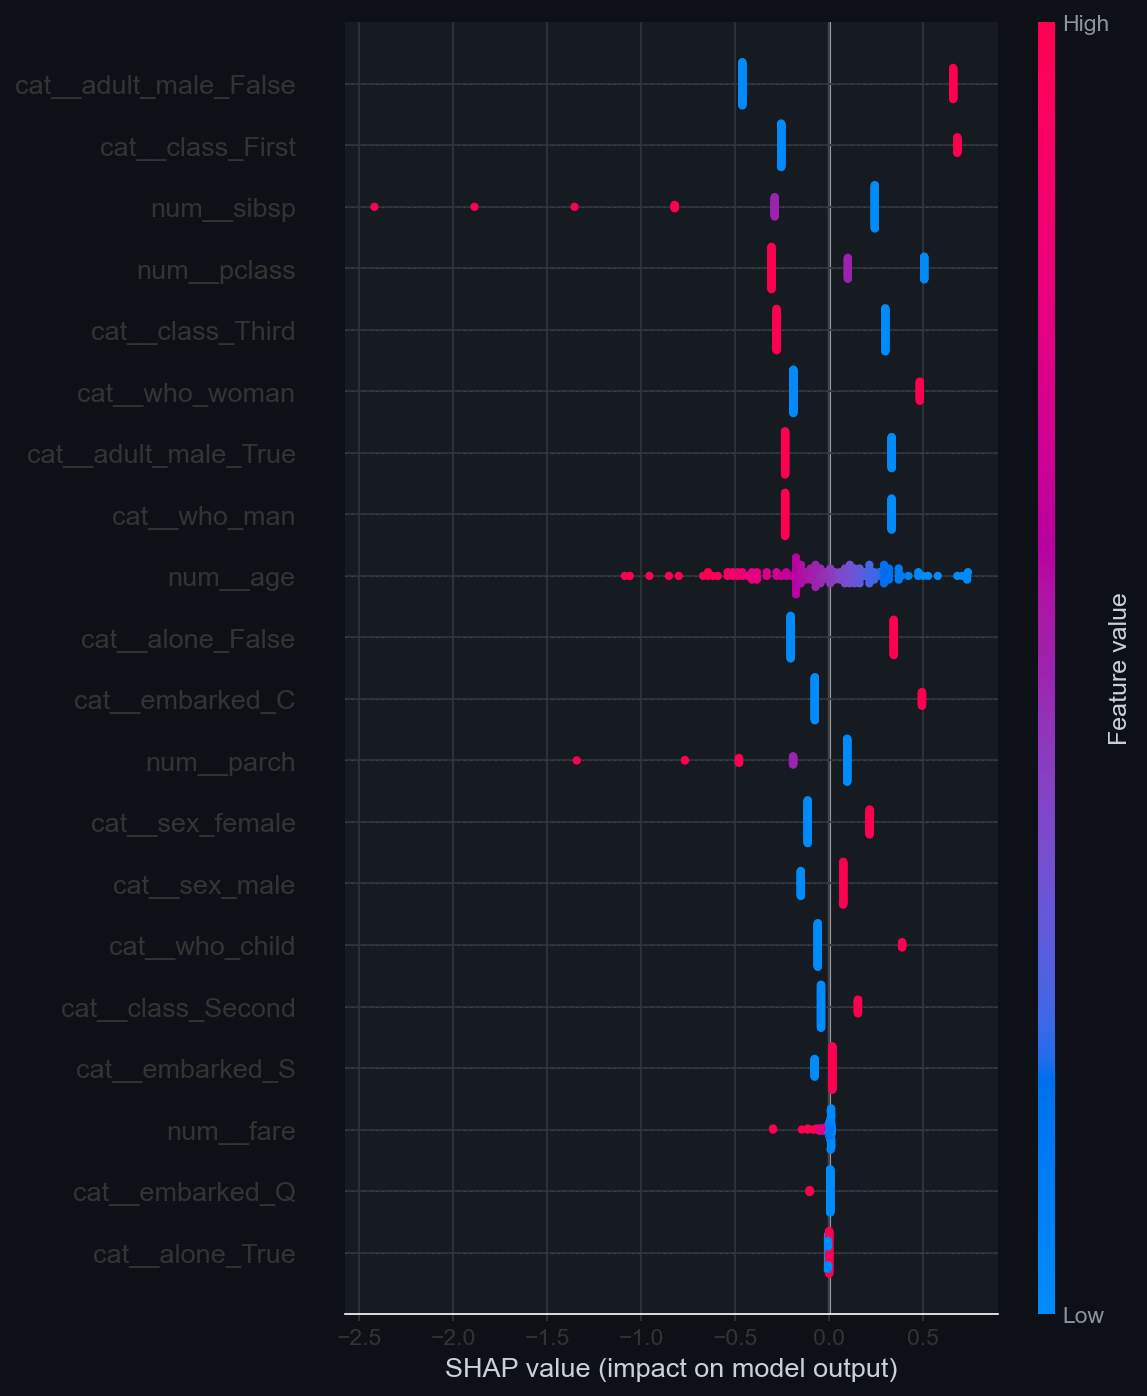

INFO:root:Report displayed successfully.
INFO:root:Saving model 'logistic_regression' to Noventis_Results\best_model.pkl...
INFO:root:Model saved successfully.


  ✓ Comparison report saved: Noventis_Results\model_comparison_report.txt
  Best model: Logistic Regression
  Score: 0.8115

[Explanation] Generating visualizations...
  ✓ Generated 4 visualization(s)
  ✓ Summary saved: Noventis_Results\model_summary.txt
  ✓ Summary report created
✓ Training completed successfully!
✓ Results saved to: Noventis_Results


In [6]:
automl = NoventisAutoML(data=df_titanic_clean, target='survived', task='classification', time_budget=30)

results = automl.fit()
automl.generate_html_report()

<h2> Regression

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


✓ Data loaded from DataFrame
  Shape: (20640, 9)
  Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
✓ Data split: Train=16512, Test=4128
Starting NoventisAutoML Training Process

[AutoML] Starting training...
  Metric: r2
  Time Budget: 30s


INFO:root:ManualPredictor initialized for regression
INFO:root:Starting ManualPredictor Training Pipeline
INFO:root:Data split: Train=16512, Test=4128
INFO:root:Running internal preprocessor...
INFO:root:Internal preprocessing complete. All data is now numeric.
INFO:root:Processing model: LINEAR_REGRESSION
INFO:root:Training finished in 0.01 seconds.
INFO:root:Processing model: RANDOM_FOREST


✓ AutoML training completed
  Best estimator: catboost

[Comparison] Comparing models...


INFO:root:Training finished in 14.09 seconds.
INFO:root:Processing model: XGBOOST
INFO:root:Training finished in 0.15 seconds.
INFO:root:Processing model: GRADIENT_BOOSTING
INFO:root:Training finished in 4.14 seconds.
INFO:root:Processing model: LIGHTGBM
INFO:root:Training finished in 0.11 seconds.
INFO:root:Processing model: CATBOOST
INFO:root:Training finished in 4.04 seconds.
INFO:root:Process Complete!
INFO:root:Best Model: CATBOOST with r2_score = 0.8492
INFO:root:Preparing report for display in output cell...
100%|===================| 4116/4128 [03:47<00:00]        

,mae,mse,rmse,r2_score
model,,,,
catboost,0.2931,0.1976,0.4445,0.8492
lightgbm,0.3078,0.2148,0.4635,0.8360
xgboost,0.3096,0.2226,0.4718,0.8301
random_forest,0.3275,0.2554,0.5053,0.8051
gradient_boosting,0.3716,0.2940,0.5422,0.7756
linear_regression,0.5332,0.5559,0.7456,0.5758

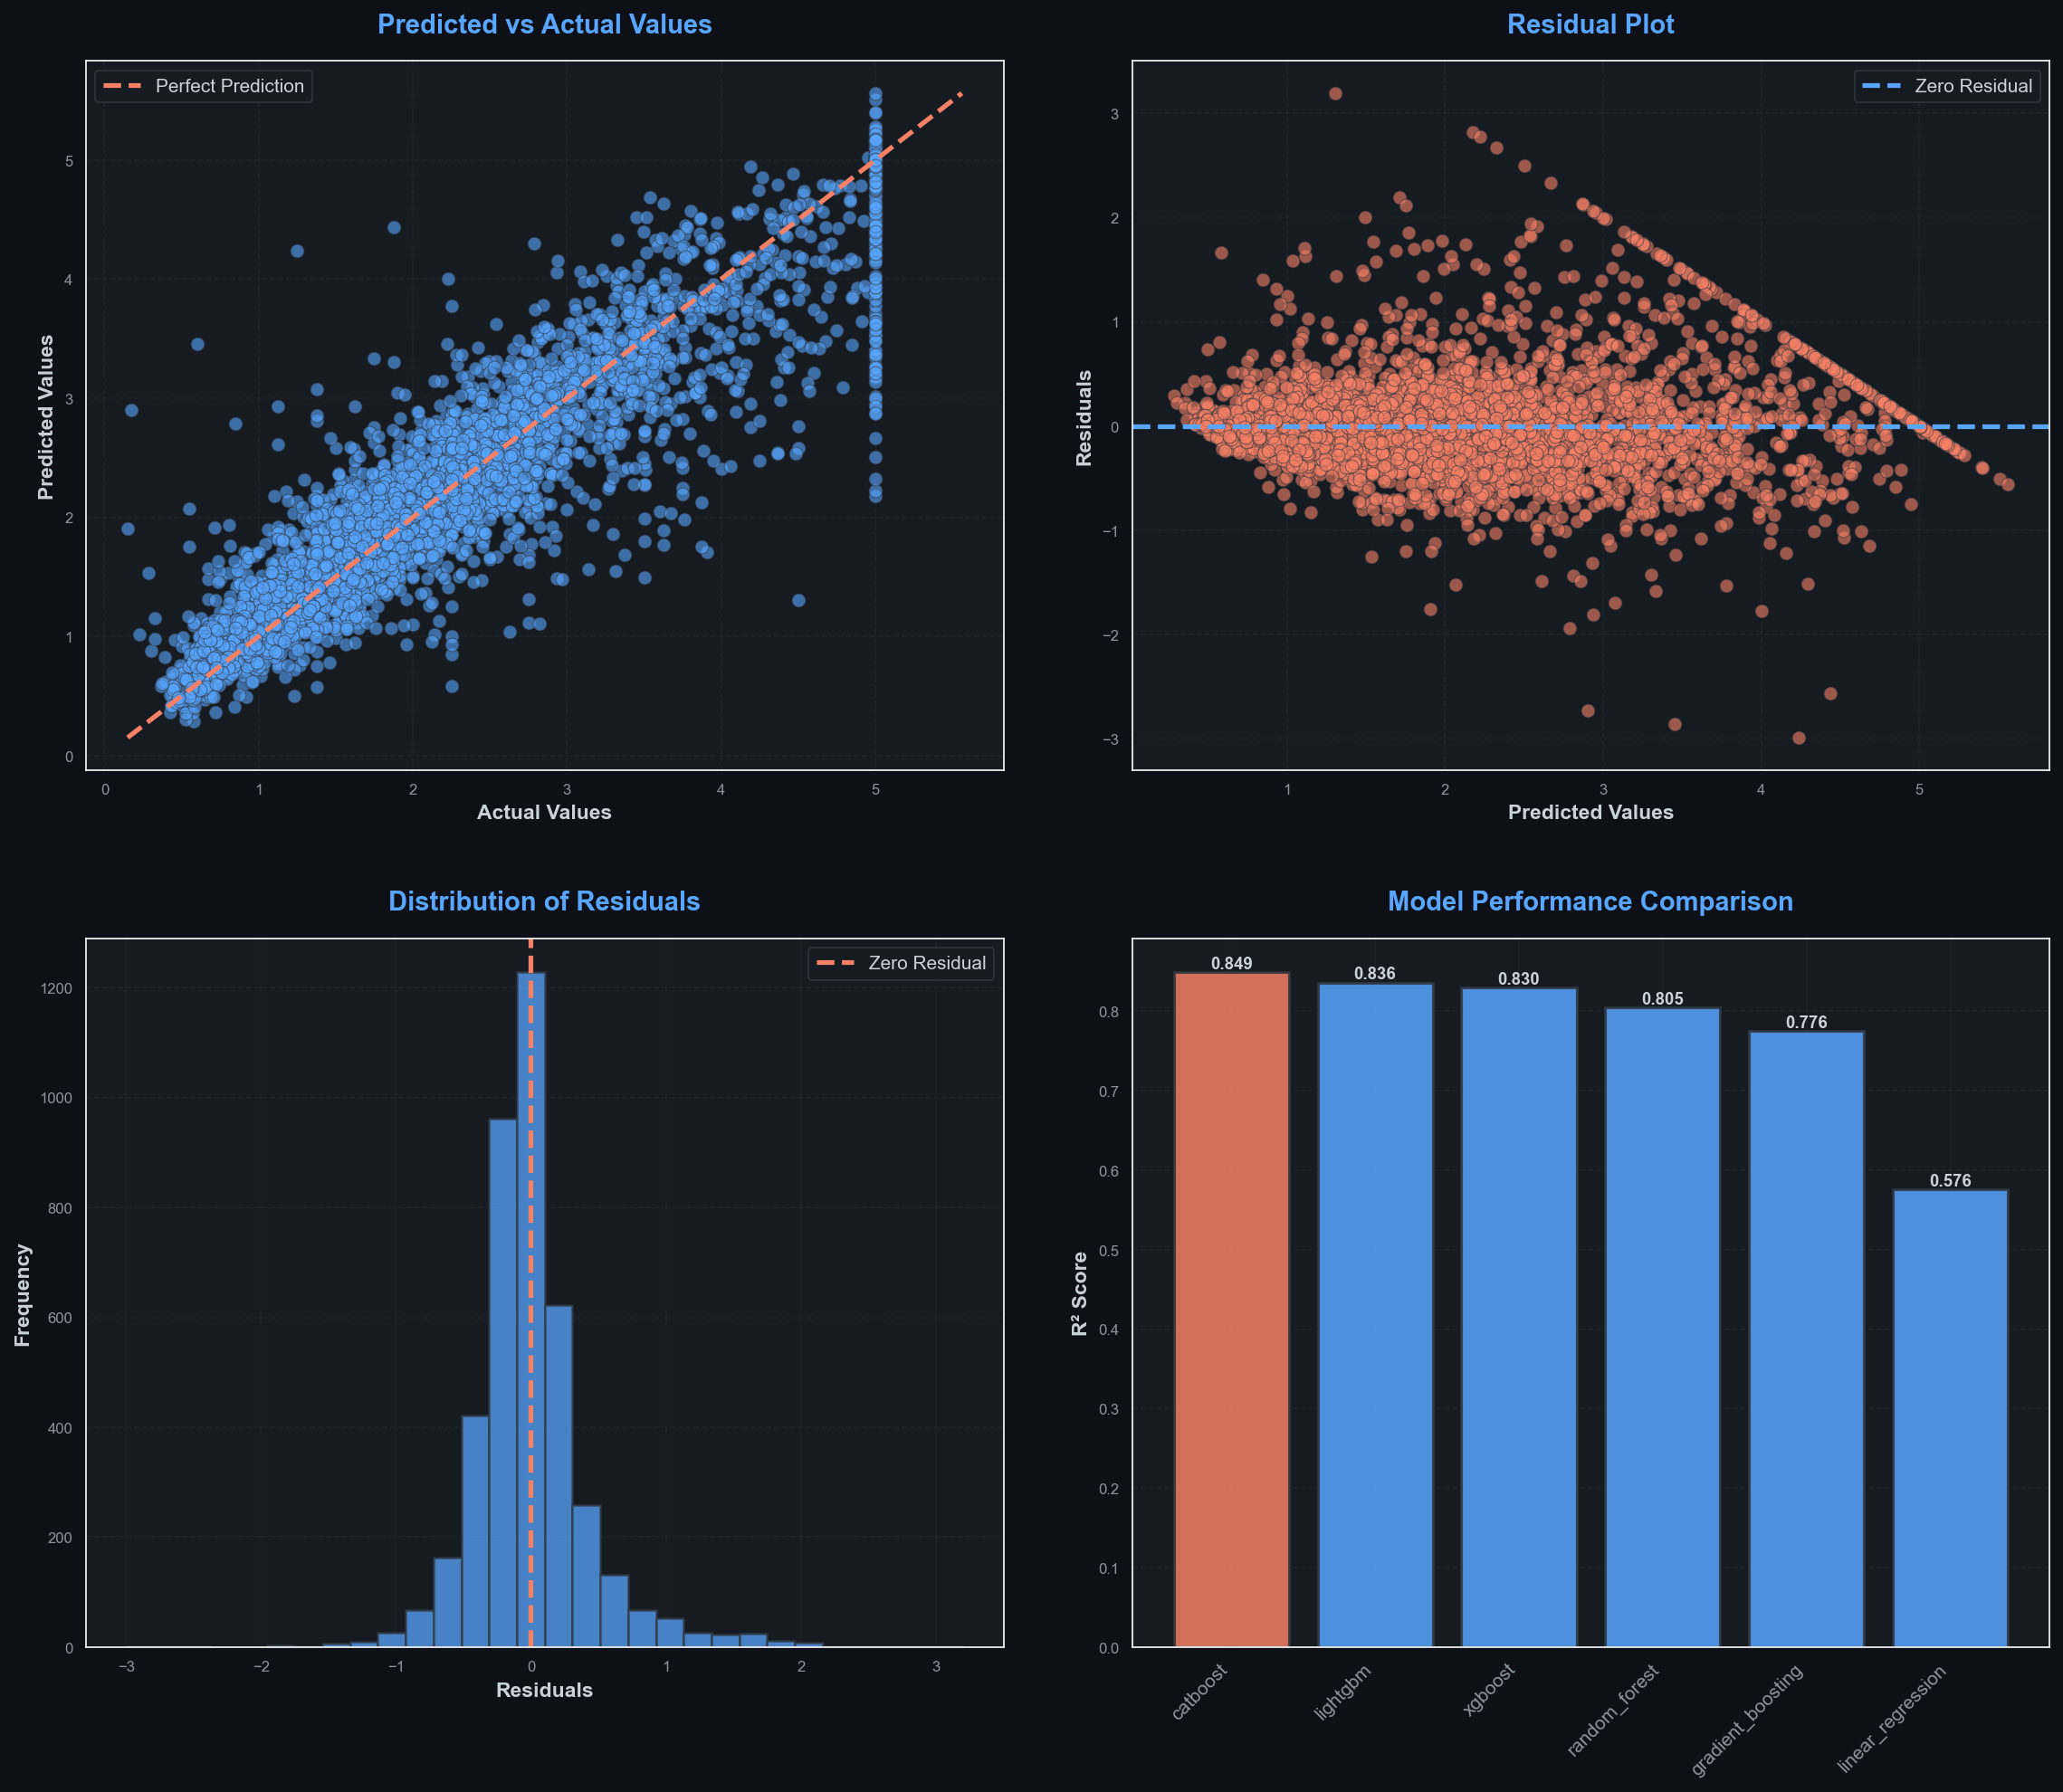
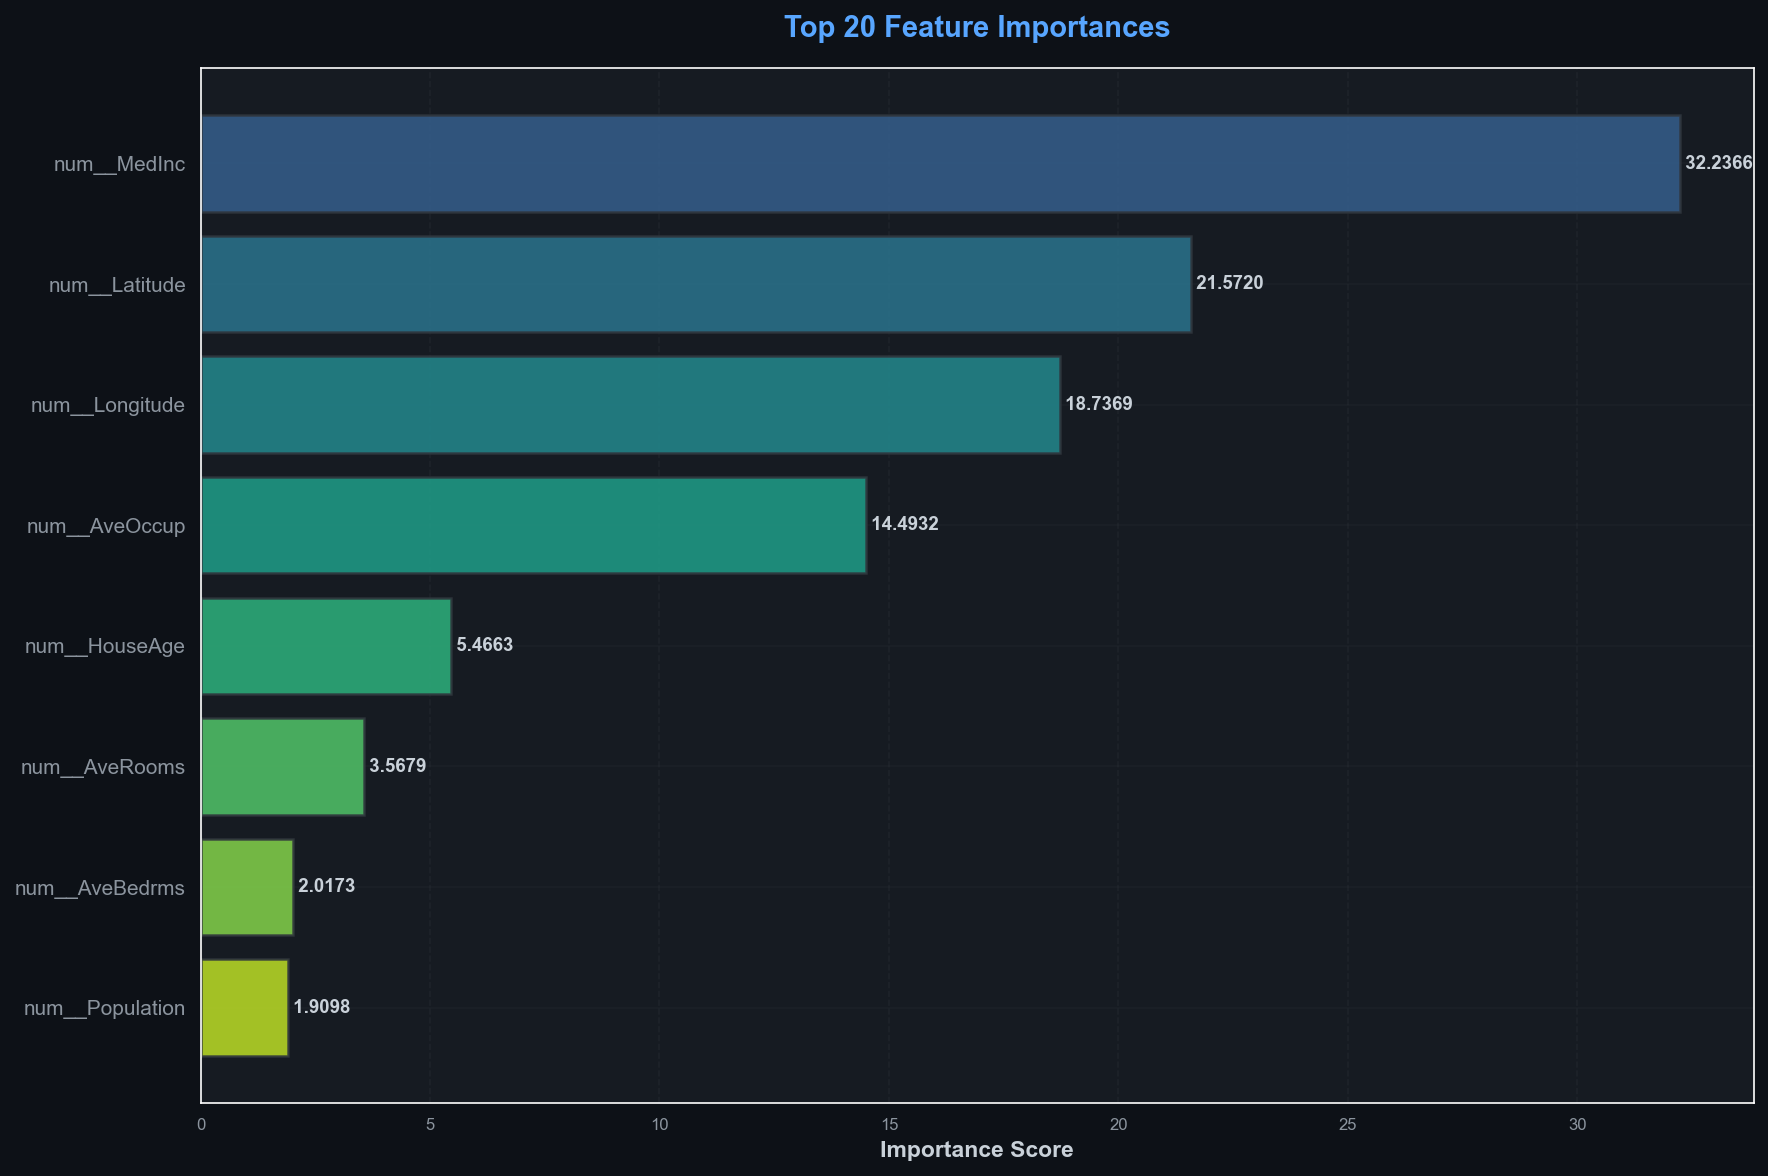
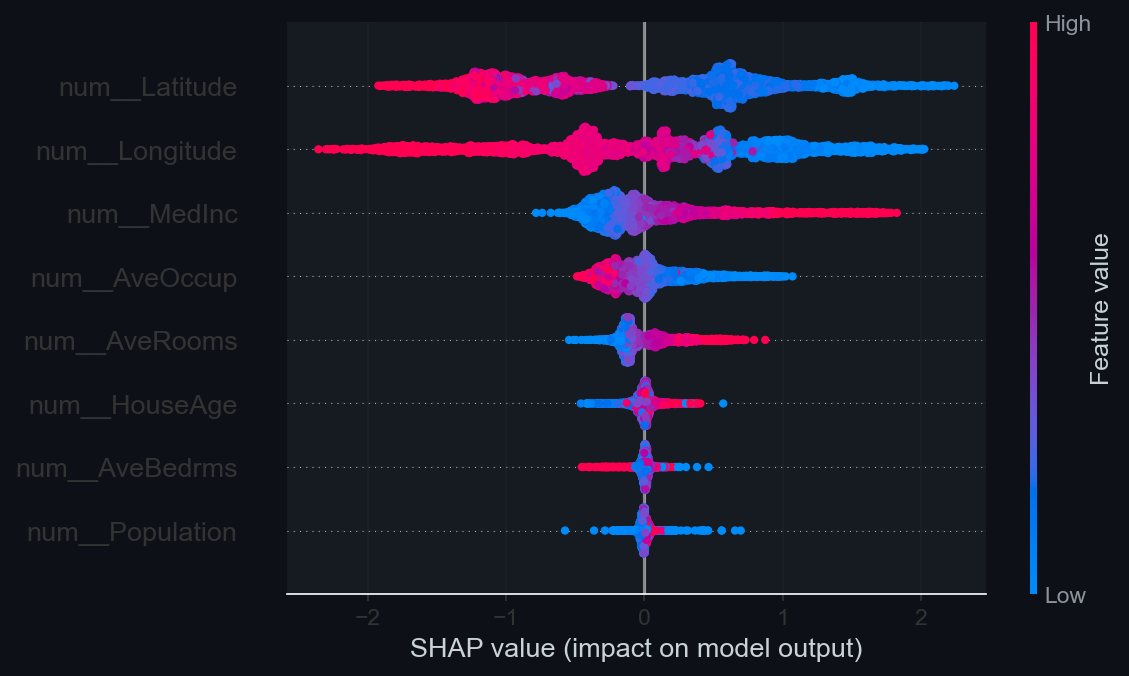

INFO:root:Report displayed successfully.
INFO:root:Saving model 'catboost' to Noventis_Results\best_model.pkl...
INFO:root:Model saved successfully.


  ✓ Comparison report saved: Noventis_Results\model_comparison_report.txt
  Best model: Catboost
  Score: 0.8492

[Explanation] Generating visualizations...
  ✓ Generated 4 visualization(s)
  ✓ Summary saved: Noventis_Results\model_summary.txt
  ✓ Summary report created
✓ Training completed successfully!
✓ Results saved to: Noventis_Results


In [7]:
automl = NoventisAutoML(data=df_housing, target='MedHouseVal', task='regression', time_budget=30)

results = automl.fit()
automl.generate_html_report()

> # Pure AutoML Search

<h2> Classification

In [8]:
automl_pure = NoventisAutoML(data=df_titanic_clean, target='survived', compare=False, models=None, task='classification', time_budget=30, metrics='accuracy')

results = automl_pure.fit()
automl_pure.generate_html_report()

✓ Data loaded from DataFrame
  Shape: (712, 12)
  Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'alone']
✓ Data split: Train=569, Test=143
Starting NoventisAutoML Training Process

[AutoML] Starting training...
  Metric: accuracy
  Time Budget: 30s


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


✓ AutoML training completed
  Best estimator: lgbm
  ✓ Model saved: Noventis_Results\best_model.pkl

[Explanation] Generating visualizations...
  ✓ Generated 6 visualization(s)
  ✓ Summary saved: Noventis_Results\model_summary.txt
  ✓ Summary report created
✓ Training completed successfully!
✓ Results saved to: Noventis_Results


<h2> Regression

In [9]:
automl = NoventisAutoML(data=df_housing, target='MedHouseVal', compare=False, models=None, task='regression', time_budget=30, metrics='mae')

results = automl.fit()
automl.generate_html_report()

✓ Data loaded from DataFrame
  Shape: (20640, 9)
  Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
✓ Data split: Train=16512, Test=4128
Starting NoventisAutoML Training Process

[AutoML] Starting training...
  Metric: mae
  Time Budget: 30s


INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


✓ AutoML training completed
  Best estimator: catboost
  ✓ Model saved: Noventis_Results\best_model.pkl

[Explanation] Generating visualizations...
  ✓ Generated 6 visualization(s)
  ✓ Summary saved: Noventis_Results\model_summary.txt
  ✓ Summary report created
✓ Training completed successfully!
✓ Results saved to: Noventis_Results


> # Manual Model Training & Comparison

<h2> Classification

In [10]:
automl_pure = NoventisAutoML(data=df_titanic_clean, target='survived', compare=False, models=['random_forest', 'lightgbm', 'logistic_regression'], task='classification')

results = automl_pure.fit()
automl_pure.generate_html_report()

INFO:root:ManualPredictor initialized for classification
INFO:root:Starting ManualPredictor Training Pipeline
INFO:root:Data split: Train=569, Test=143
INFO:root:Running internal preprocessor...
INFO:root:Internal preprocessing complete. All data is now numeric.
INFO:root:Processing model: RANDOM_FOREST


✓ Data loaded from DataFrame
  Shape: (712, 12)
  Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'alone']
✓ Data split: Train=569, Test=143
Starting NoventisAutoML Training Process

[Manual] Training 3 model(s)...


INFO:root:Training finished in 0.18 seconds.
INFO:root:Processing model: LIGHTGBM
INFO:root:Training finished in 0.06 seconds.
INFO:root:Processing model: LOGISTIC_REGRESSION
INFO:root:Training finished in 0.01 seconds.
INFO:root:Process Complete!
INFO:root:Best Model: LOGISTIC_REGRESSION with f1_score = 0.8115
INFO:root:Saving model 'logistic_regression' to Noventis_Results\best_model.pkl...
INFO:root:Model saved successfully.
INFO:root:Saving model 'logistic_regression' to Noventis_Results\best_model.pkl...
INFO:root:Model saved successfully.


  ✓ random_forest completed
  ✓ lightgbm completed
  ✓ logistic_regression completed

[Explanation] Generating visualizations...
  ✓ Generated 4 visualization(s)
  ✓ Summary saved: Noventis_Results\model_summary.txt
  ✓ Summary report created
✓ Training completed successfully!
✓ Results saved to: Noventis_Results


<h2> Regression

In [11]:
automl = NoventisAutoML(data=df_housing, target='MedHouseVal', compare=False, models=['linear_regression', 'random_forest', 'xgboost'], task='regression')

results = automl.fit()
automl.generate_html_report()

INFO:root:ManualPredictor initialized for regression
INFO:root:Starting ManualPredictor Training Pipeline
INFO:root:Data split: Train=16512, Test=4128
INFO:root:Running internal preprocessor...
INFO:root:Internal preprocessing complete. All data is now numeric.
INFO:root:Processing model: LINEAR_REGRESSION
INFO:root:Training finished in 0.00 seconds.
INFO:root:Processing model: RANDOM_FOREST


✓ Data loaded from DataFrame
  Shape: (20640, 9)
  Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']
✓ Data split: Train=16512, Test=4128
Starting NoventisAutoML Training Process

[Manual] Training 3 model(s)...


INFO:root:Training finished in 12.65 seconds.
INFO:root:Processing model: XGBOOST
INFO:root:Training finished in 0.13 seconds.
INFO:root:Process Complete!
INFO:root:Best Model: XGBOOST with r2_score = 0.8301
INFO:root:Saving model 'xgboost' to Noventis_Results\best_model.pkl...
INFO:root:Model saved successfully.
INFO:root:Saving model 'xgboost' to Noventis_Results\best_model.pkl...
INFO:root:Model saved successfully.


  ✓ linear_regression completed
  ✓ random_forest completed
  ✓ xgboost completed

[Explanation] Generating visualizations...
  ✓ Generated 4 visualization(s)
  ✓ Summary saved: Noventis_Results\model_summary.txt
  ✓ Summary report created
✓ Training completed successfully!
✓ Results saved to: Noventis_Results


Index,Actual,Predicted,Error,Abs Error
